### *Algorithmic Trading Strategy Moving Average 100 (MA)*

In [39]:
# importing library modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [40]:
# Importing Dataframes for S&P 500 using Yfinance
df = yf.download('^GSPC',start='2015-01-01')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000
...,...,...,...,...,...
2025-03-31,5611.850098,5627.560059,5488.729980,5527.910156,5257250000
2025-04-01,5633.069824,5650.569824,5558.520020,5597.529785,4434500000


We are going to be using a simple strategy first, $Moving$ $Average$ or $MA$ $100$, which takes in consideration of 100 day price.
This is one of the simple trading strategy, which suggests we can buy when the MA line is below 100 day average and sell when MA is above its 100 day average.

In [41]:
# Add a column for MA100
df['MA100'] = df.Close.rolling(100).mean()
df

Price,Close,High,Low,Open,Volume,MA100
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,NaN
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,NaN
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,NaN
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,NaN
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,NaN
...,...,...,...,...,...,...
2025-03-31,5611.850098,5627.560059,5488.729980,5527.910156,5257250000,5927.876699
2025-04-01,5633.069824,5650.569824,5558.520020,5597.529785,4434500000,5927.080498


In [42]:
# dropping the Nan Values
# We drop the NaN values so this doesn't hinder our analysis
df.dropna(inplace=True)
df

Price,Close,High,Low,Open,Volume,MA100
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2015-05-27,2123.479980,2126.219971,2105.129883,2105.129883,3127960000,2078.878900
2015-05-28,2120.790039,2122.270020,2112.860107,2122.270020,2980350000,2079.504801
2015-05-29,2107.389893,2120.659912,2104.889893,2120.659912,3927390000,2080.372900
2015-06-01,2111.729980,2119.149902,2102.540039,2108.639893,3011710000,2081.464100
2015-06-02,2109.600098,2117.590088,2099.139893,2110.409912,3049350000,2082.301101
...,...,...,...,...,...,...
2025-03-31,5611.850098,5627.560059,5488.729980,5527.910156,5257250000,5927.876699
2025-04-01,5633.069824,5650.569824,5558.520020,5597.529785,4434500000,5927.080498


<Axes: xlabel='Date'>

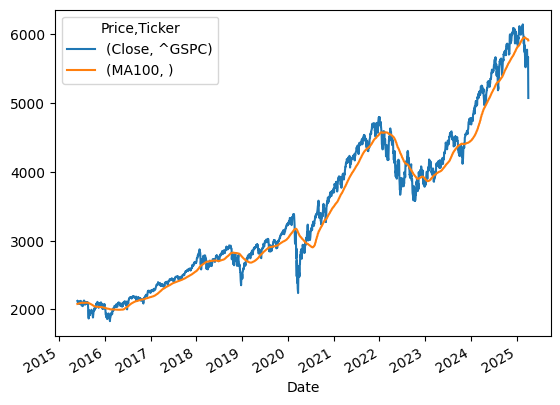

In [5]:
#Plotting Moving average column
df[['Close', 'MA100']].plot(kind='line')

### Bias
One of the most common mistake while trading/investing is bias more noticeably 'Look-Ahead Bias'. Look ahead bias occurs when we use historical data to interpret the future outcomes even when we do not have the data present.
For example using tomorrow's weather forecast to predict today's weather. However, tomorrow hasn't arrived yet so that data is not available to compare.

The solution to this would be, instead of trading on the same day when we get the signal. The earliest possible time to execute the trade would be at the opning of the next day, but that too would cause the bias.

We will shift the price one day before this implementation allows us to actually represent the actual buy or sell price available a day after the signal has generated.

In [6]:
# Adding a Price column
df['price'] = df.Open.shift(-1)

Next we are going to iterate over the data of days. This will help us to determine the Buyprice and Sellprice. We will also use a boolean flag to avoid overlapping of trades.

In [7]:
# Implementing strategy
buyprices, sellprices = [], []

# Flag to track if we are holding a position
in_position = False

for index, row in df.iterrows():
    # Ensure row.Close and row.MA100 exist and are comparable
    if 'Close' in df.columns and 'MA100' in df.columns:
        close_price = float(row['Close'])
        moving_avg = float(row['MA100'])

        if not in_position and close_price > moving_avg:
            buyprices.append(close_price)  
            in_position = True

        elif in_position and close_price < moving_avg:
            sellprices.append(close_price)
            in_position = False

# Ensure the last trade is closed
if in_position:
    sellprices.append(df.iloc[-1]['Close'])


C:\Users\aditya\AppData\Local\Temp\ipykernel_10676\482005385.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_price = float(row['Close'])
C:\Users\aditya\AppData\Local\Temp\ipykernel_10676\482005385.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  moving_avg = float(row['MA100'])


In [8]:
len(buyprices), len(sellprices)

(55, 55)

In [9]:
df

Price,Close,High,Low,Open,Volume,MA100,price
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2015-05-27,2123.479980,2126.219971,2105.129883,2105.129883,3127960000,2078.878900,2122.270020
2015-05-28,2120.790039,2122.270020,2112.860107,2122.270020,2980350000,2079.504801,2120.659912
2015-05-29,2107.389893,2120.659912,2104.889893,2120.659912,3927390000,2080.372900,2108.639893
2015-06-01,2111.729980,2119.149902,2102.540039,2108.639893,3011710000,2081.464100,2110.409912
2015-06-02,2109.600098,2117.590088,2099.139893,2110.409912,3049350000,2082.301101,2110.639893
...,...,...,...,...,...,...,...
2025-03-31,5611.850098,5627.560059,5488.729980,5527.910156,5257250000,5927.876699,5597.529785
2025-04-01,5633.069824,5650.569824,5558.520020,5597.529785,4434500000,5927.080498,5580.759766


In [10]:
trades = pd.DataFrame({'buys':buyprices, 'sells':sellprices})


In [12]:
# Realtive Profit
trades['profit'] = (trades.sells-trades.buys)/trades.buys
trades

,buys,sells,profit
0,2123.479980,2079.280029,-0.020815
1,2105.199951,2084.429932,-0.009866
2,2096.290039,2057.639893,-0.018437
3,2099.600098,2079.649902,-0.009502
4,2108.570068,2093.320068,-0.007232
5,2099.840088,2083.560059,-0.007753
6,2104.179932,2084.070068,-0.009557
7,2102.439941,2096.919922,-0.002626
8,2052.510010,2023.040039,-0.014358
9,2053.189941,2012.369995,-0.019881


We would have made a percent of roughly 65% in 1 year.

Next, we will assume there is a charge for every trade. Considering the charge is 0.005%, we will found out relative profit again.

In [20]:
trades['profit'] = (trades.sells - trades.buys)/trades.buys - 0.005

In [21]:
# Prodfit for 1 year
(trades.profit + 1).prod() -1

0.2547380593698845

<Axes: >

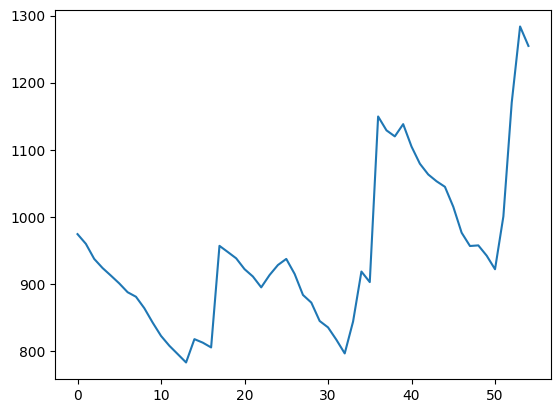

In [22]:
# Cumulative profit
(1000* (trades.profit + 1).cumprod()).plot()

In [23]:
df

Price,Close,High,Low,Open,Volume,MA100,price
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2015-05-27,2123.479980,2126.219971,2105.129883,2105.129883,3127960000,2078.878900,2122.270020
2015-05-28,2120.790039,2122.270020,2112.860107,2122.270020,2980350000,2079.504801,2120.659912
2015-05-29,2107.389893,2120.659912,2104.889893,2120.659912,3927390000,2080.372900,2108.639893
2015-06-01,2111.729980,2119.149902,2102.540039,2108.639893,3011710000,2081.464100,2110.409912
2015-06-02,2109.600098,2117.590088,2099.139893,2110.409912,3049350000,2082.301101,2110.639893
...,...,...,...,...,...,...,...
2025-03-31,5611.850098,5627.560059,5488.729980,5527.910156,5257250000,5927.876699,5597.529785
2025-04-01,5633.069824,5650.569824,5558.520020,5597.529785,4434500000,5927.080498,5580.759766


In [24]:
(5074.080078/2123.479980) -1

1.3895116157393677

As observed we see we would have made a profit of 138% from S&P, if we held on to these stocks in the portfolio.

### Additonal things to consider
* We shoudl consider for how long our strategy has been exposed in the market.
* We should consider the highest highs and lowest lows for a single day.
* We should also consider inflation as a factor in our profits.
* We should consider


In [28]:
# maximum profit for 1 day
df.Close.max()

Ticker
^GSPC    6144.149902
dtype: float64

### Vectors

Now, we will try to learn more about Vectors. Our next goal is to backtest again without using loops but Vectors.
Vectors have both magnitude and direction. If there is an object that is moving at a certain 'speed' and it is moving in a certain 'direction' East/West etc, we can say that object is a Vector.

In [43]:
df

Price,Close,High,Low,Open,Volume,MA100
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2015-05-27,2123.479980,2126.219971,2105.129883,2105.129883,3127960000,2078.878900
2015-05-28,2120.790039,2122.270020,2112.860107,2122.270020,2980350000,2079.504801
2015-05-29,2107.389893,2120.659912,2104.889893,2120.659912,3927390000,2080.372900
2015-06-01,2111.729980,2119.149902,2102.540039,2108.639893,3011710000,2081.464100
2015-06-02,2109.600098,2117.590088,2099.139893,2110.409912,3049350000,2082.301101
...,...,...,...,...,...,...
2025-03-31,5611.850098,5627.560059,5488.729980,5527.910156,5257250000,5927.876699
2025-04-01,5633.069824,5650.569824,5558.520020,5597.529785,4434500000,5927.080498


In [44]:
df['price'] = df.Open.shift(-1)